# Diwali Sales Analysis - Exploratory Data Analysis (EDA)

## Introduction
This notebook presents an Exploratory Data Analysis (EDA) of Diwali sales data. The analysis aims to provide insights into the sales patterns during the Diwali season, focusing on various demographic and product-related aspects.

## Data
The data used for analysis is sourced from the "Diwali Sales Data.csv" file. It contains information about customers, their demographics, purchases, and other relevant details.

## Setup
The notebook begins by importing necessary packages and loading the dataset.

In [1]:
#Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
#Load Diwali sales data 
diwali_sales = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

## Exploratory Data Analysis (EDA)

### Data Overview

The notebook starts with an exploration of the dataset's structure and content, including the shape, column names, and data types.

In [3]:
diwali_sales.shape

(11251, 15)

In [4]:
#Display top 10 rows in dataset
diwali_sales.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
#Check info

diwali_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

Preprocessing steps include handling missing values and data type conversion.

In [6]:
#Drop columns with null values 
diwali_sales.drop(['Status','unnamed1'], axis = 1, inplace=True)

In [7]:
#Check for missing values
diwali_sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
diwali_sales.shape

(11251, 13)

In [9]:
#Drop rows with missing values
diwali_sales.dropna(inplace=True)

In [10]:
diwali_sales.shape

(11239, 13)

In [11]:
# Convert 'Amount' column to integer type
diwali_sales['Amount'] = diwali_sales['Amount'].astype('int')

In [12]:
diwali_sales['Amount'].dtype

dtype('int32')

In [13]:
diwali_sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
diwali_sales.rename(columns = {'Cust_name':'Customer_name'}, inplace = True)

In [15]:
diwali_sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
diwali_sales[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Analysis

### Gender Distribution
Analysis of gender distribution and sales by gender.

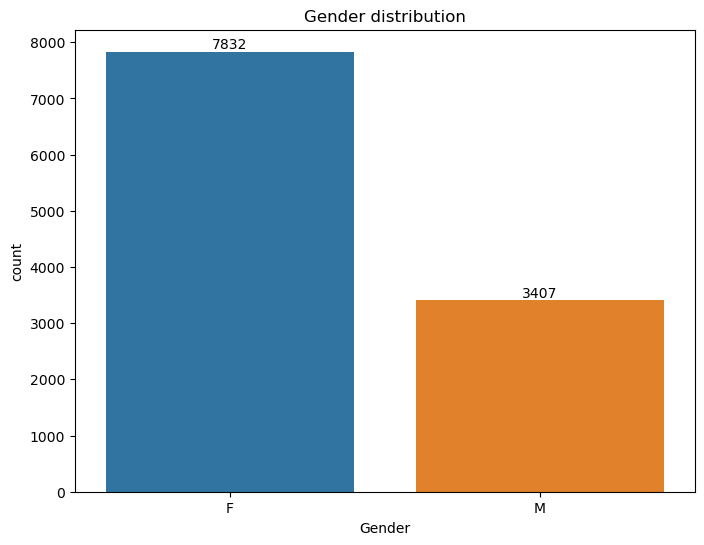

In [17]:
# Gender distribution

plt.figure(figsize=(8,6))
plt.title('Gender distribution')
gen = sns.countplot(x='Gender', data = diwali_sales)
for bars in gen.containers:
    gen.bar_label(bars)

plt.show()

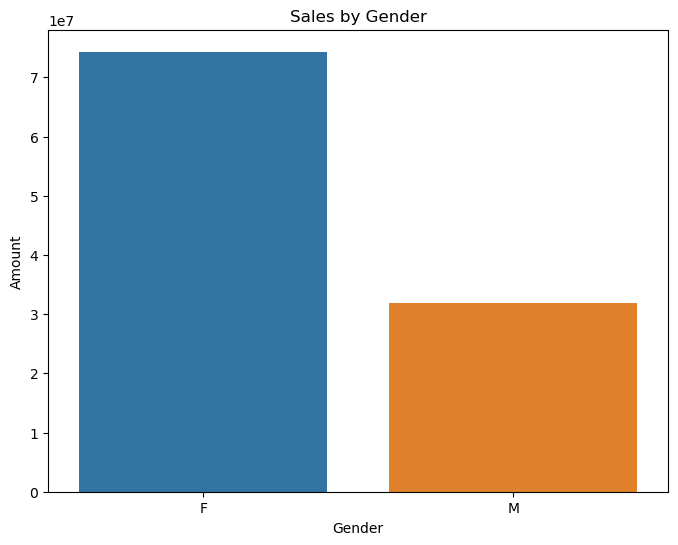

In [18]:
plt.figure(figsize=(8,6))
plt.title('Sales by Gender')
sales_gen = diwali_sales.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x='Gender', y='Amount', data = sales_gen)
plt.show()

**From above graphs we can see that most of the buyers are females and even purchasing power of females are greater than men**

### Age Distribution
Exploration of age distribution and sales by age groups.

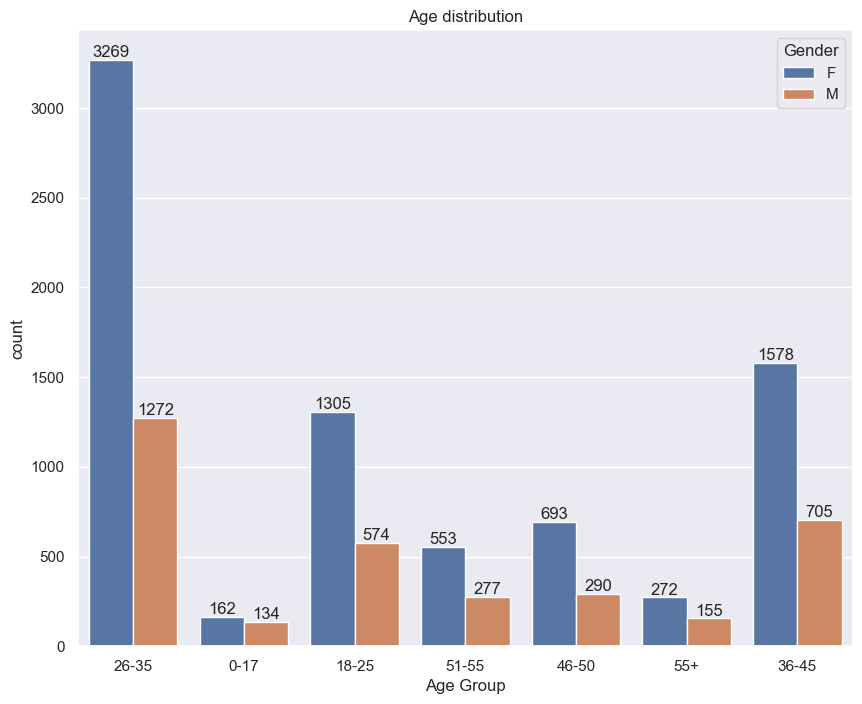

In [41]:
plt.figure(figsize=(10,8))
plt.title('Age distribution')

ag = sns.countplot(data = diwali_sales,x='Age Group', hue='Gender')

for bars in ag.containers:
    ag.bar_label(bars)

plt.show()

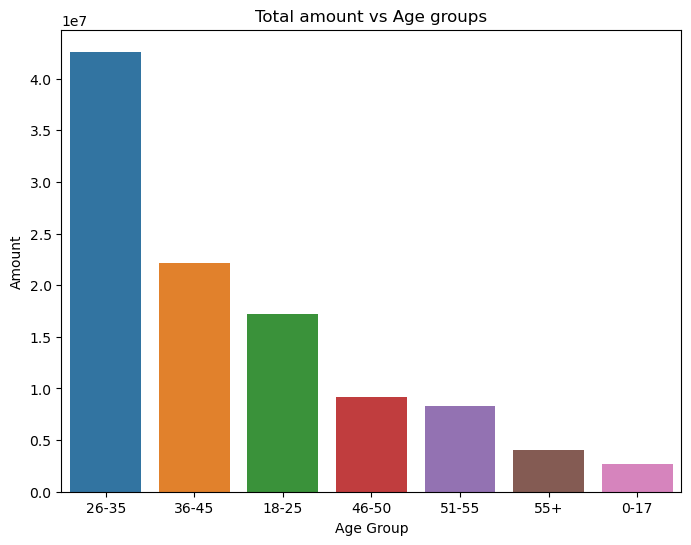

In [20]:
plt.figure(figsize=(8,6))
plt.title('Total amount vs Age groups')
sales_age = diwali_sales.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.show()

**From above graphs we can see that most of the buyers are from Age group 26-35**

### State
Exploration of Top 10 State distribution and sales by States.

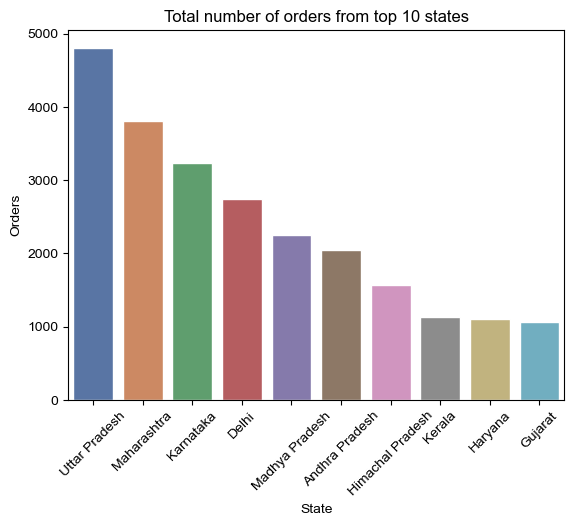

In [21]:
#Total number of orders from top 10 states
plt.title('Total number of orders from top 10 states')

sales_state = diwali_sales.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State',y='Orders')
plt.xticks(rotation=45) 
plt.show()

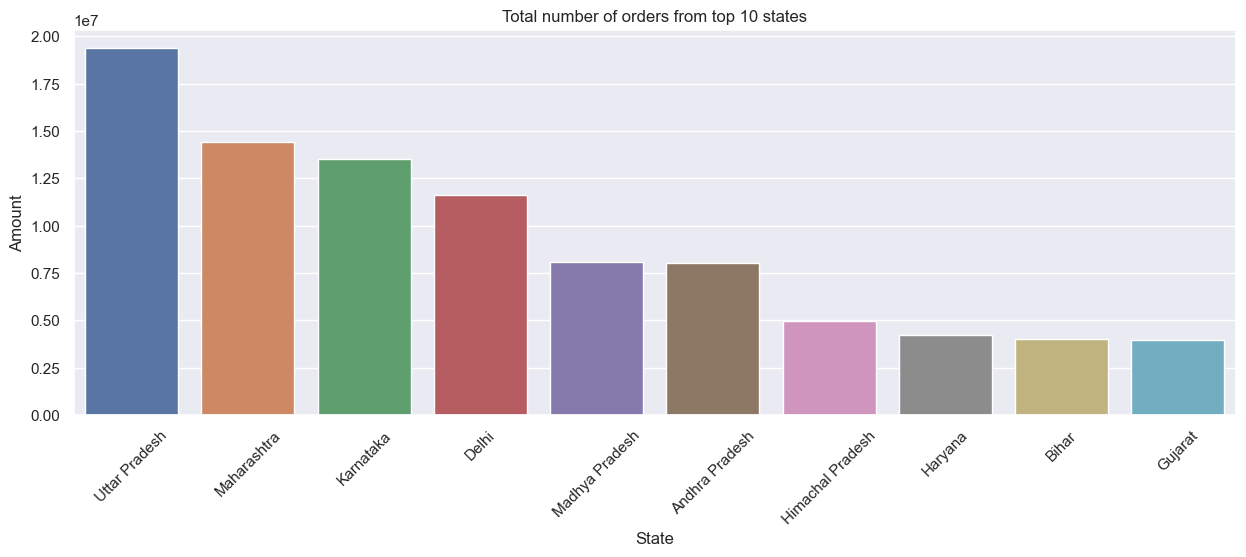

In [22]:
#Total sales from top 10 states
plt.title('Total number of orders from top 10 states')

sales_state = diwali_sales.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State',y='Amount')
plt.xticks(rotation=45) 
plt.show()

**From above graphs we can see that most of the orders and total sales/Amount are from Uttar Pradesh, Maharashtra and Karnataka**

### Marital Status distribution

Exploration of Marital Status distribution and sales by Marital Status.

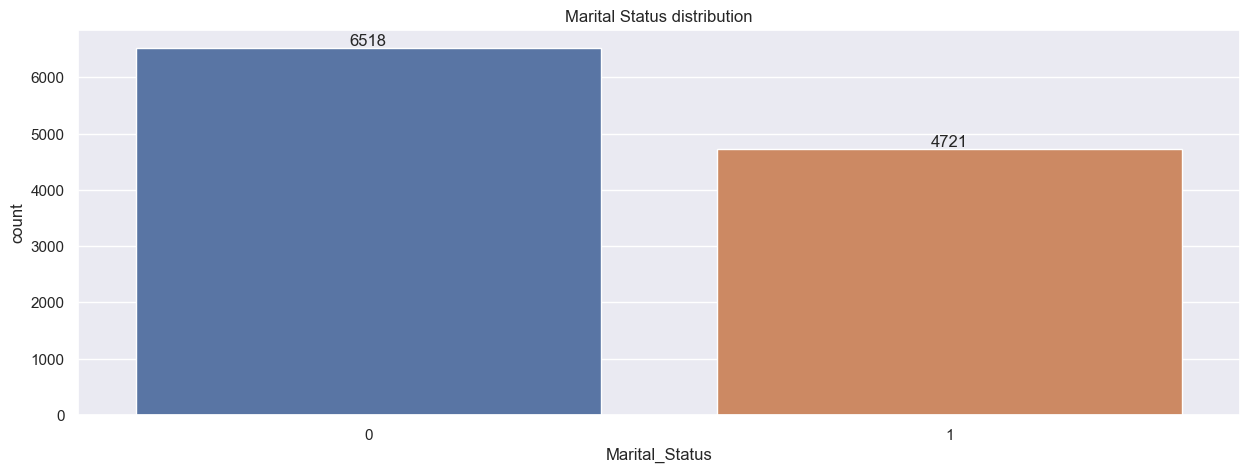

In [23]:
plt.title('Marital Status distribution')
marital = sns.countplot(data = diwali_sales, x= 'Marital_Status' )

sns.set(rc={'figure.figsize':(15,6)})

for bars in marital.containers:
    marital.bar_label(bars)

plt.show()

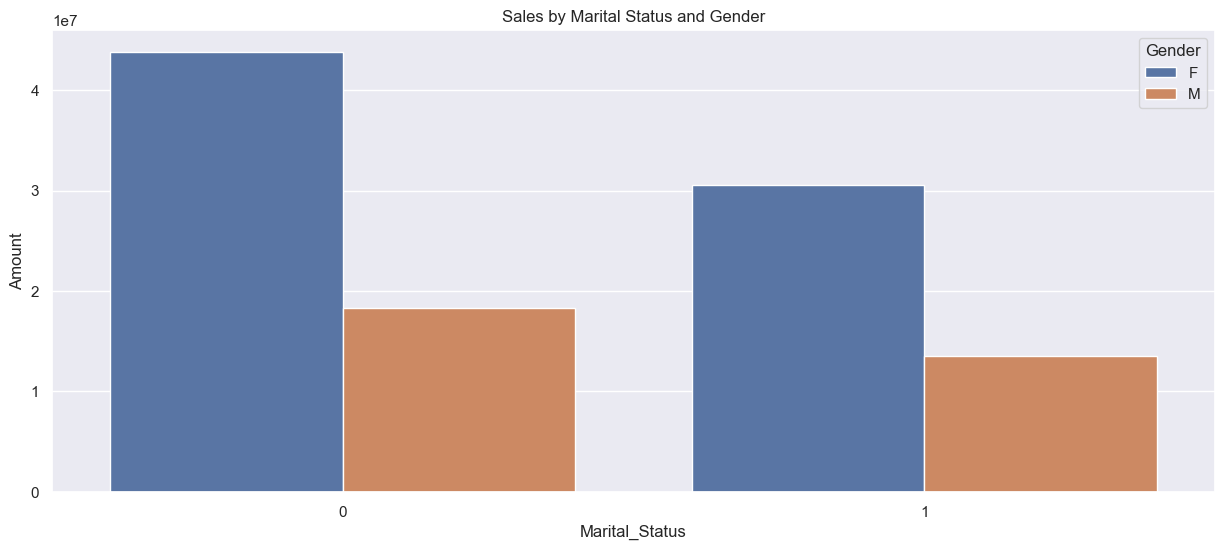

In [24]:
plt.title('Sales by Marital Status and Gender')
sales_marital = diwali_sales.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(7,6)})
sns.barplot(data=sales_marital, x='Marital_Status',y='Amount',hue='Gender')
plt.show()

**From the above graphs we can see that most of the buyers are married (women) and they have high purchasing power**

### Occupation distribution

Exploration of Occupation distribution and sales by Occupation.

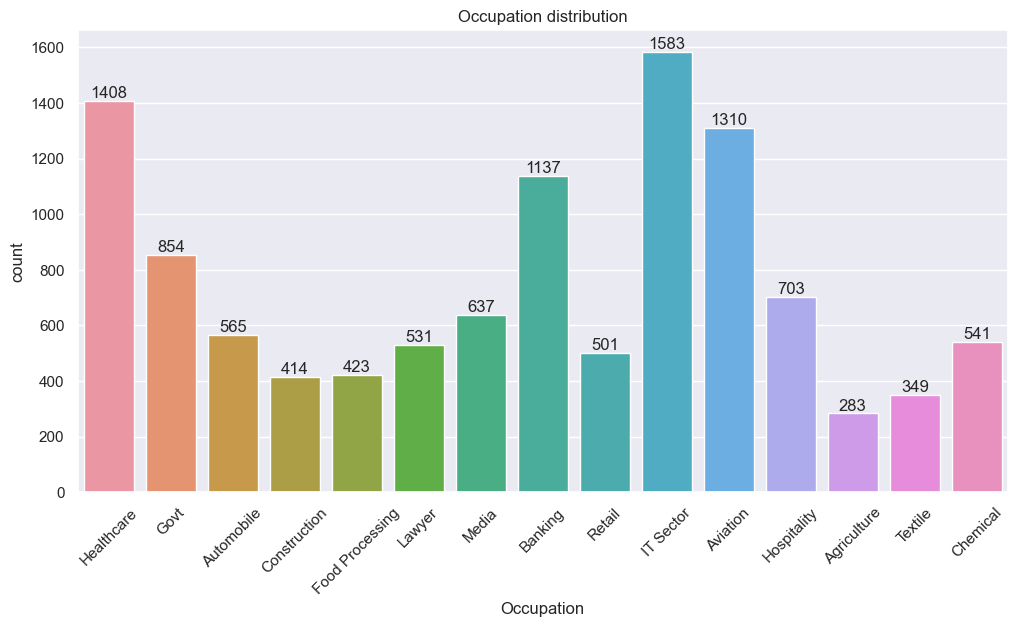

In [42]:
plt.title('Occupation distribution')
occ = sns.countplot(data = diwali_sales, x= 'Occupation' )

sns.set(rc={'figure.figsize':(12,6)})

for bars in occ.containers:
    occ.bar_label(bars)

plt.xticks(rotation=45) 
plt.show()

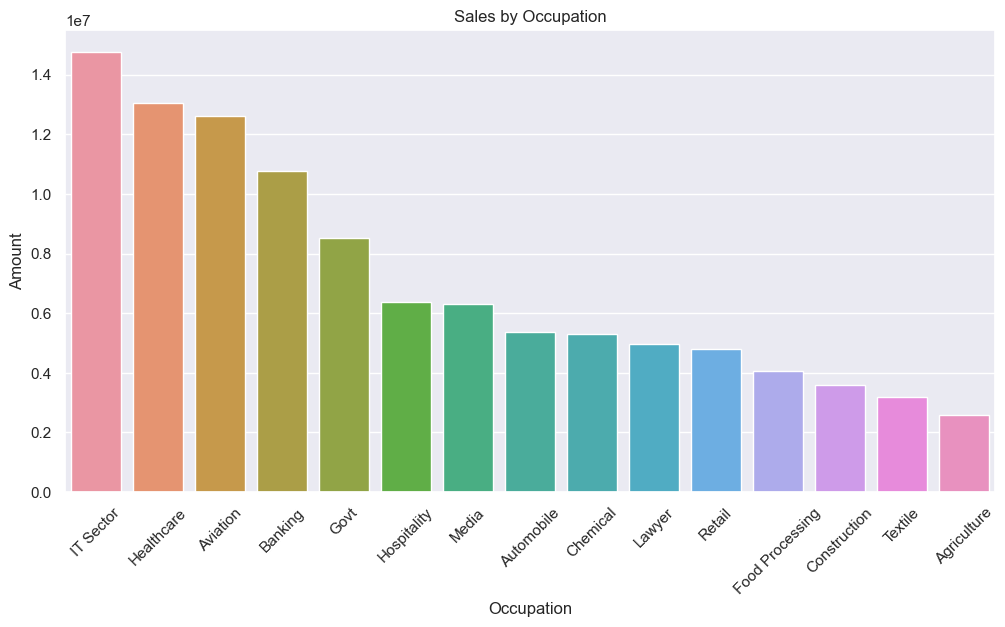

In [40]:
plt.title('Sales by Occupation')
sales_occu = diwali_sales.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occu, x='Occupation',y='Amount')

plt.xticks(rotation=45) 
plt.show()

**From above graphs we can say that most of the buyers are from IT sector, Healthcare and Aviation**

## Product Category Distribution

Exploration of Product Category distribution and sales by Product Category.

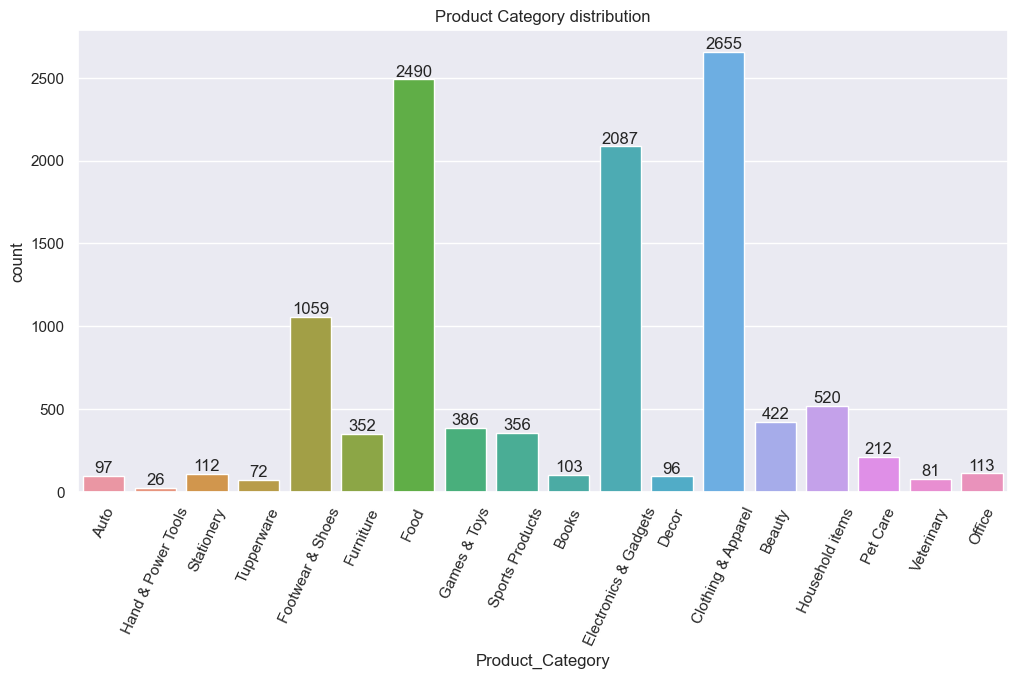

In [27]:
plt.title('Product Category distribution')
pro_cat = sns.countplot(data = diwali_sales, x= 'Product_Category' )

sns.set(rc={'figure.figsize':(12,6)})

for bars in pro_cat.containers:
    pro_cat.bar_label(bars)

plt.xticks(rotation=65) 
plt.show()

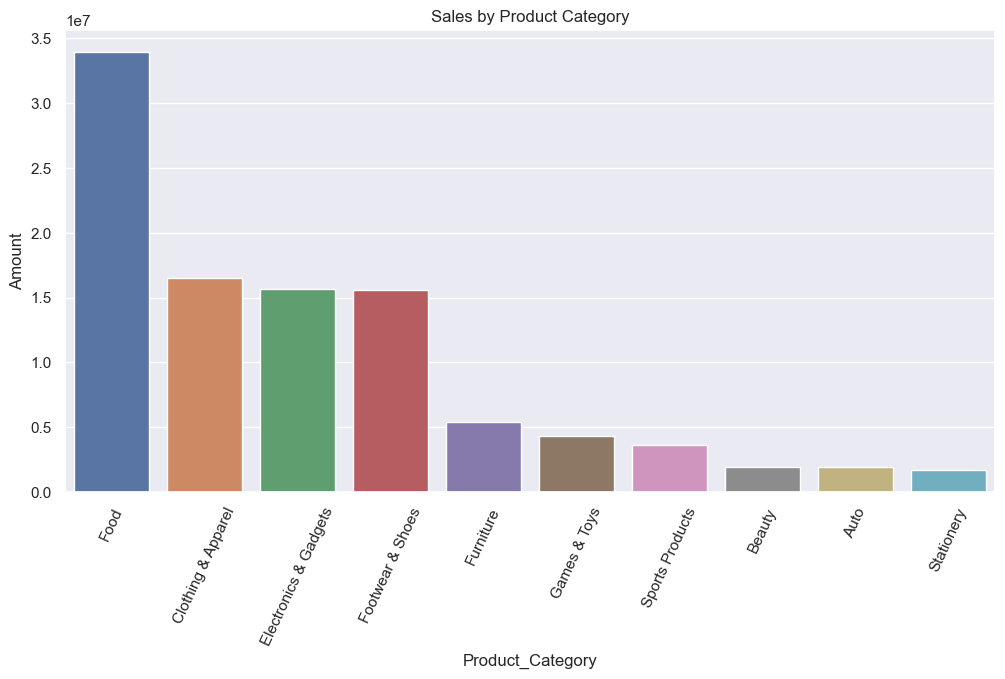

In [39]:
plt.title('Sales by Product Category')
sales_pro_cat = diwali_sales.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_pro_cat, x='Product_Category',y='Amount')
plt.xticks(rotation=65) 
plt.show()

**From the above graphs we can see that most of the sold products are from Food, Clothing and Electronics category**

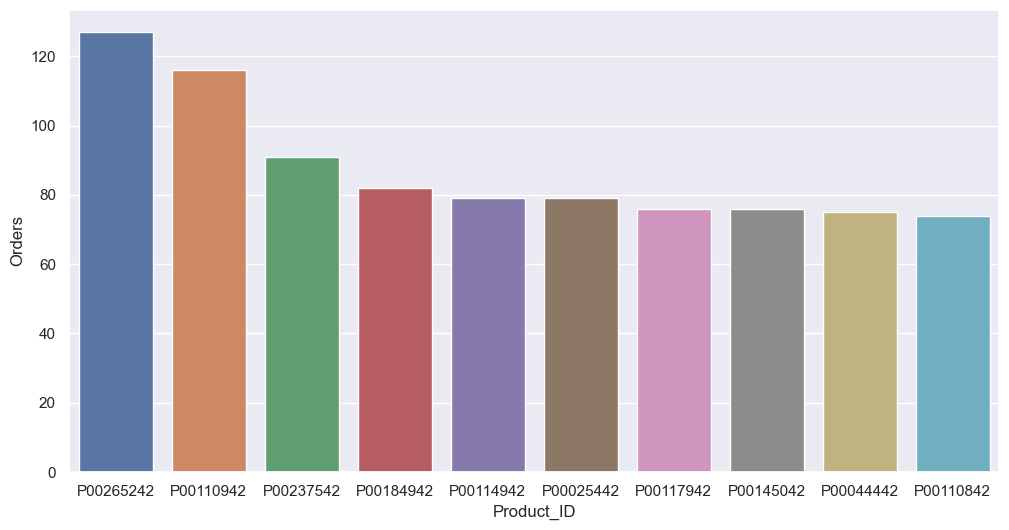

In [36]:
plt.title('Sales by Product Category')
Sales_pro = diwali_sales.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(data = Sales_pro, x ='Product_ID',y='Orders')
plt.show()

## Conclusion

The analysis reveals that married women aged 26-35 years from UP, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation sectors, are more likely to purchase products from Food, Clothing, and Electronics categories during Diwali sales.
